In [2]:
import pandas as pd

review_df = pd.read_csv('./labeledTrainData.tsv',header=0,sep='\t',quoting=3)
review_df.head(10)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."
5,"""8196_8""",1,"""I dont know why people think this is such a b..."
6,"""7166_2""",0,"""This movie could have been very good, but com..."
7,"""10633_1""",0,"""I watched this video at a friend's house. I'm..."
8,"""319_1""",0,"""A friend of mine bought this film for £1, and..."
9,"""8713_10""",1,"""<br /><br />This movie is full of references...."


In [3]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [4]:
import re

#br 태그를 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

#영문이 아닌 문자는 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x: re.sub("[^a-zA-Z]"," ",x))

In [5]:
from sklearn.model_selection import train_test_split

#라벨과 데이터의 분리
class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'],axis=1,inplace=False)

#학습용/ 테스트용 데이터 셋을 70:30 의 비율론 분리
X_train,X_test,y_train,y_test = train_test_split(feature_df,class_df,test_size=0.3, random_state=100)

In [6]:
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [7]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english',ngram_range=(1,2))),
    ('lr_clf',LogisticRegression(C=10))
])

pipeline.fit(X_train['review'],y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])

# pred_probs

print('예측 정확도: {0:.4f}\n ROC-AUC : {1:.4f}\n'.format(accuracy_score(y_test,pred),roc_auc_score(y_test,pred_probs[:,1])))




/usr/local/anaconda3/envs/ai/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


예측 정확도: 0.8847
 ROC-AUC : 0.9498



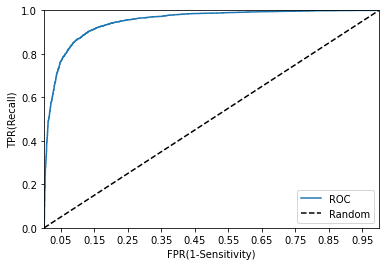

In [8]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

# ROC 곡선의 시각화
def roc_curve_plot(y_test, pred_proba_c1):
    #임계값에 따른 FPR, TPR 값을반환 받음
    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_c1)
    # ROC곡선을 그래프로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test,pred_probs[:,1])

In [9]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english',ngram_range=(1,2))),
    ('lr_clf',LogisticRegression(C=10))
])

pipeline.fit(X_train['review'],y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도: {0:.4f}\n ROC-AUC : {1:.4f}\n'.format(accuracy_score(y_test,pred),roc_auc_score(y_test,pred_probs)))

예측 정확도: 0.8920
 ROC-AUC : 0.9587

